In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing the dataset
test = pd.read_csv('TEST_FINAL.csv' )
train = pd.read_csv('TRAIN.csv' )
SId = test["ID"]

In [3]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [5]:
test.shape

(22265, 8)

In [6]:
train.columns[train.isna().any()]

Index([], dtype='object')

<AxesSubplot:xlabel='Store_Type', ylabel='count'>

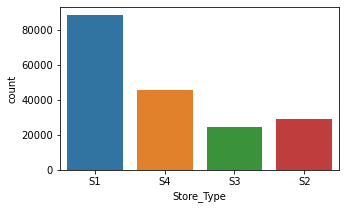

In [7]:
fig,ax = plt.subplots(figsize=(5,3))
sns.countplot(data=train,x='Store_Type')

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

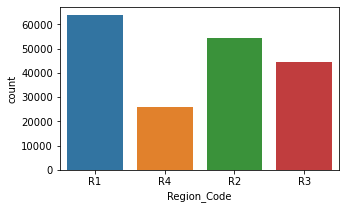

In [8]:
fig,ax = plt.subplots(figsize=(5,3))
sns.countplot(data=train,x='Region_Code')

<AxesSubplot:xlabel='Location_Type', ylabel='count'>

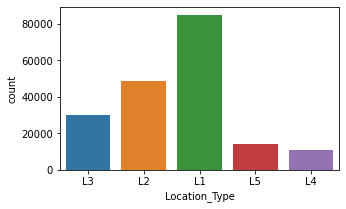

In [9]:
fig,ax = plt.subplots(figsize=(5,3))
sns.countplot(data=train,x='Location_Type')

<AxesSubplot:xlabel='Store_Type', ylabel='count'>

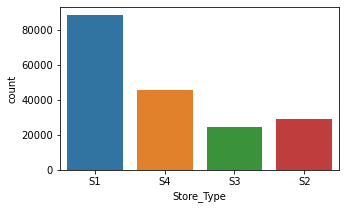

In [10]:
fig,ax = plt.subplots(figsize=(5,3))
sns.countplot(data=train,x='Store_Type')

<AxesSubplot:xlabel='Holiday', ylabel='count'>

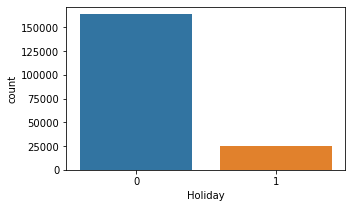

In [11]:
fig,ax = plt.subplots(figsize=(5,3))
sns.countplot(data=train,x='Holiday')

In [12]:
dummies = pd.get_dummies(train['Discount'],drop_first=True)
train = pd.concat( [train , dummies] , axis = 'columns' )
train = train.drop(["Discount"], axis = 1)
train.head(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,#Order,Sales,Yes
0,T1000001,1,S1,L3,R1,2018-01-01,1,9,7011.84,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,60,51789.12,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,42,36868.20,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,23,19715.16,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,62,45614.52,1
5,T1000006,249,S1,L3,R2,2018-01-01,1,39,34211.22,1
6,T1000007,248,S1,L1,R2,2018-01-01,1,40,35352.66,1
7,T1000008,247,S1,L1,R3,2018-01-01,1,64,52650.00,1
8,T1000009,246,S3,L1,R3,2018-01-01,1,62,42633.78,1
9,T1000010,254,S4,L1,R1,2018-01-01,1,87,62572.80,1


In [13]:
dummies = pd.get_dummies(train['Store_Type'],drop_first=True)
train = pd.concat( [train , dummies] , axis = 'columns' )
train = train.drop(["Store_Type"], axis = 1)
train.head(10)

,ID,Store_id,Location_Type,Region_Code,Date,Holiday,#Order,Sales,Yes,S2,S3,S4
0,T1000001,1,L3,R1,2018-01-01,1,9,7011.84,1,0,0,0
1,T1000002,253,L2,R1,2018-01-01,1,60,51789.12,1,0,0,1
2,T1000003,252,L2,R1,2018-01-01,1,42,36868.20,1,0,1,0
3,T1000004,251,L3,R1,2018-01-01,1,23,19715.16,1,1,0,0
4,T1000005,250,L3,R4,2018-01-01,1,62,45614.52,1,1,0,0
5,T1000006,249,L3,R2,2018-01-01,1,39,34211.22,1,0,0,0
6,T1000007,248,L1,R2,2018-01-01,1,40,35352.66,1,0,0,0
7,T1000008,247,L1,R3,2018-01-01,1,64,52650.00,1,0,0,0
8,T1000009,246,L1,R3,2018-01-01,1,62,42633.78,1,0,1,0
9,T1000010,254,L1,R1,2018-01-01,1,87,62572.80,1,0,0,1


In [14]:
dummies = pd.get_dummies(train['Location_Type'],drop_first=True)
train = pd.concat( [train , dummies] , axis = 'columns' )
train = train.drop(["Location_Type"], axis = 1)
train.head(10)

,ID,Store_id,Region_Code,Date,Holiday,#Order,Sales,Yes,S2,S3,S4,L2,L3,L4,L5
0,T1000001,1,R1,2018-01-01,1,9,7011.84,1,0,0,0,0,1,0,0
1,T1000002,253,R1,2018-01-01,1,60,51789.12,1,0,0,1,1,0,0,0
2,T1000003,252,R1,2018-01-01,1,42,36868.20,1,0,1,0,1,0,0,0
3,T1000004,251,R1,2018-01-01,1,23,19715.16,1,1,0,0,0,1,0,0
4,T1000005,250,R4,2018-01-01,1,62,45614.52,1,1,0,0,0,1,0,0
5,T1000006,249,R2,2018-01-01,1,39,34211.22,1,0,0,0,0,1,0,0
6,T1000007,248,R2,2018-01-01,1,40,35352.66,1,0,0,0,0,0,0,0
7,T1000008,247,R3,2018-01-01,1,64,52650.00,1,0,0,0,0,0,0,0
8,T1000009,246,R3,2018-01-01,1,62,42633.78,1,0,1,0,0,0,0,0
9,T1000010,254,R1,2018-01-01,1,87,62572.80,1,0,0,1,0,0,0,0


In [15]:
train["Date"] = pd.to_datetime((train["Date"]), errors = 'coerce')
train["date_issued:year"] = train["Date"].dt.year
train["date_issued:month"] = train["Date"].dt.month
train["date_issued:day"] = train["Date"].dt.day

In [16]:
dummies = pd.get_dummies(train['Region_Code'],drop_first=True)
train = pd.concat( [train , dummies] , axis = 'columns' )
train = train.drop(["Region_Code","ID","Store_id","#Order","Date"], axis = 1)
train.head(10)

,Holiday,Sales,Yes,S2,S3,S4,L2,L3,L4,L5,date_issued:year,date_issued:month,date_issued:day,R2,R3,R4
0,1,7011.84,1,0,0,0,0,1,0,0,2018,1,1,0,0,0
1,1,51789.12,1,0,0,1,1,0,0,0,2018,1,1,0,0,0
2,1,36868.20,1,0,1,0,1,0,0,0,2018,1,1,0,0,0
3,1,19715.16,1,1,0,0,0,1,0,0,2018,1,1,0,0,0
4,1,45614.52,1,1,0,0,0,1,0,0,2018,1,1,0,0,1
5,1,34211.22,1,0,0,0,0,1,0,0,2018,1,1,1,0,0
6,1,35352.66,1,0,0,0,0,0,0,0,2018,1,1,1,0,0
7,1,52650.00,1,0,0,0,0,0,0,0,2018,1,1,0,1,0
8,1,42633.78,1,0,1,0,0,0,0,0,2018,1,1,0,1,0
9,1,62572.80,1,0,0,1,0,0,0,0,2018,1,1,0,0,0


In [17]:
dummies = pd.get_dummies(test['Discount'],drop_first=True)
test = pd.concat( [test , dummies] , axis = 'columns' )
test = test.drop(["Discount"], axis = 1)
test.head(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Yes
0,T1188341,171,S4,L2,R3,2019-06-01,0,0
1,T1188342,172,S1,L1,R1,2019-06-01,0,0
2,T1188343,173,S4,L2,R1,2019-06-01,0,0
3,T1188344,174,S1,L1,R4,2019-06-01,0,0
4,T1188345,170,S1,L1,R2,2019-06-01,0,0
5,T1188346,175,S4,L2,R1,2019-06-01,0,0
6,T1188347,176,S4,L2,R3,2019-06-01,0,0
7,T1188348,169,S1,L2,R4,2019-06-01,0,0
8,T1188349,14,S3,L2,R4,2019-06-01,0,0
9,T1188350,177,S2,L1,R4,2019-06-01,0,0


In [18]:
dummies = pd.get_dummies(test['Store_Type'],drop_first=True)
test = pd.concat( [test , dummies] , axis = 'columns' )
test = test.drop(["Store_Type"], axis = 1)
test.head(10)

,ID,Store_id,Location_Type,Region_Code,Date,Holiday,Yes,S2,S3,S4
0,T1188341,171,L2,R3,2019-06-01,0,0,0,0,1
1,T1188342,172,L1,R1,2019-06-01,0,0,0,0,0
2,T1188343,173,L2,R1,2019-06-01,0,0,0,0,1
3,T1188344,174,L1,R4,2019-06-01,0,0,0,0,0
4,T1188345,170,L1,R2,2019-06-01,0,0,0,0,0
5,T1188346,175,L2,R1,2019-06-01,0,0,0,0,1
6,T1188347,176,L2,R3,2019-06-01,0,0,0,0,1
7,T1188348,169,L2,R4,2019-06-01,0,0,0,0,0
8,T1188349,14,L2,R4,2019-06-01,0,0,0,1,0
9,T1188350,177,L1,R4,2019-06-01,0,0,1,0,0


In [19]:
dummies = pd.get_dummies(test['Location_Type'],drop_first=True)
test = pd.concat( [test , dummies] , axis = 'columns' )
test = test.drop(["Location_Type"], axis = 1)
test.head(10)

,ID,Store_id,Region_Code,Date,Holiday,Yes,S2,S3,S4,L2,L3,L4,L5
0,T1188341,171,R3,2019-06-01,0,0,0,0,1,1,0,0,0
1,T1188342,172,R1,2019-06-01,0,0,0,0,0,0,0,0,0
2,T1188343,173,R1,2019-06-01,0,0,0,0,1,1,0,0,0
3,T1188344,174,R4,2019-06-01,0,0,0,0,0,0,0,0,0
4,T1188345,170,R2,2019-06-01,0,0,0,0,0,0,0,0,0
5,T1188346,175,R1,2019-06-01,0,0,0,0,1,1,0,0,0
6,T1188347,176,R3,2019-06-01,0,0,0,0,1,1,0,0,0
7,T1188348,169,R4,2019-06-01,0,0,0,0,0,1,0,0,0
8,T1188349,14,R4,2019-06-01,0,0,0,1,0,1,0,0,0
9,T1188350,177,R4,2019-06-01,0,0,1,0,0,0,0,0,0


In [20]:
test["Date"] = pd.to_datetime((test["Date"]), errors = 'coerce')
test["date_issued:year"] = test["Date"].dt.year
test["date_issued:month"] = test["Date"].dt.month
test["date_issued:day"] = test["Date"].dt.day

In [21]:
dummies = pd.get_dummies(test['Region_Code'],drop_first=True)
test = pd.concat( [test , dummies] , axis = 'columns' )
test = test.drop(["Region_Code","ID","Store_id","Date"], axis = 1)
test.head(10)

,Holiday,Yes,S2,S3,S4,L2,L3,L4,L5,date_issued:year,date_issued:month,date_issued:day,R2,R3,R4
0,0,0,0,0,1,1,0,0,0,2019,6,1,0,1,0
1,0,0,0,0,0,0,0,0,0,2019,6,1,0,0,0
2,0,0,0,0,1,1,0,0,0,2019,6,1,0,0,0
3,0,0,0,0,0,0,0,0,0,2019,6,1,0,0,1
4,0,0,0,0,0,0,0,0,0,2019,6,1,1,0,0
5,0,0,0,0,1,1,0,0,0,2019,6,1,0,0,0
6,0,0,0,0,1,1,0,0,0,2019,6,1,0,1,0
7,0,0,0,0,0,1,0,0,0,2019,6,1,0,0,1
8,0,0,0,1,0,1,0,0,0,2019,6,1,0,0,1
9,0,0,1,0,0,0,0,0,0,2019,6,1,0,0,1


In [22]:
train.head()

,Holiday,Sales,Yes,S2,S3,S4,L2,L3,L4,L5,date_issued:year,date_issued:month,date_issued:day,R2,R3,R4
0,1,7011.84,1,0,0,0,0,1,0,0,2018,1,1,0,0,0
1,1,51789.12,1,0,0,1,1,0,0,0,2018,1,1,0,0,0
2,1,36868.20,1,0,1,0,1,0,0,0,2018,1,1,0,0,0
3,1,19715.16,1,1,0,0,0,1,0,0,2018,1,1,0,0,0
4,1,45614.52,1,1,0,0,0,1,0,0,2018,1,1,0,0,1


In [23]:
test.head()

,Holiday,Yes,S2,S3,S4,L2,L3,L4,L5,date_issued:year,date_issued:month,date_issued:day,R2,R3,R4
0,0,0,0,0,1,1,0,0,0,2019,6,1,0,1,0
1,0,0,0,0,0,0,0,0,0,2019,6,1,0,0,0
2,0,0,0,0,1,1,0,0,0,2019,6,1,0,0,0
3,0,0,0,0,0,0,0,0,0,2019,6,1,0,0,1
4,0,0,0,0,0,0,0,0,0,2019,6,1,1,0,0


In [24]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)
X_train = train.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
X_train.head()

,Holiday,Yes,S2,S3,S4,L2,L3,L4,L5,date_issued:year,date_issued:month,date_issued:day,R2,R3,R4
0,1,1,0,0,0,0,1,0,0,2018,1,1,0,0,0
1,1,1,0,0,1,1,0,0,0,2018,1,1,0,0,0
2,1,1,0,1,0,1,0,0,0,2018,1,1,0,0,0
3,1,1,1,0,0,0,1,0,0,2018,1,1,0,0,0
4,1,1,1,0,0,0,1,0,0,2018,1,1,0,0,1


In [25]:
y_train = train.iloc[:, 1]
y_train.head()

0     7011.84
1    51789.12
2    36868.20
3    19715.16
4    45614.52
Name: Sales, dtype: float64

In [26]:
X_test = test
X_test.head()

,Holiday,Yes,S2,S3,S4,L2,L3,L4,L5,date_issued:year,date_issued:month,date_issued:day,R2,R3,R4
0,0,0,0,0,1,1,0,0,0,2019,6,1,0,1,0
1,0,0,0,0,0,0,0,0,0,2019,6,1,0,0,0
2,0,0,0,0,1,1,0,0,0,2019,6,1,0,0,0
3,0,0,0,0,0,0,0,0,0,2019,6,1,0,0,1
4,0,0,0,0,0,0,0,0,0,2019,6,1,1,0,0


from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

In [27]:
import xgboost
classifier=xgboost.XGBRegressor()
regressor=xgboost.XGBRegressor()

In [28]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [29]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)

random_cv.best_estimator_

classifierXG= xgboost.XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=15,
             min_child_weight=4, monotone_constraints=None,
             n_estimators=100, n_jobs=8, num_parallel_tree=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=None)

classifierXG.fit(X_train,y_train)

In [30]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

Using TensorFlow backend.


In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 12))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))
# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 100)

In [ ]:
# Initializing the ANN by calling the Sequential class fromm keras of Tensorflow
from keras.models import Sequential
from keras.layers import Dense
ann = tf.keras.models.Sequential()

#----------------------------------------------------------------------------------
# Adding "fully connected" INPUT layer to the Sequential ANN by calling Dense class
#----------------------------------------------------------------------------------
# Number of Units = 6 and Activation Function = Rectifier
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))


#----------------------------------------------------------------------------------
# Adding "fully connected" SECOND layer to the Sequential AMM by calling Dense class
#----------------------------------------------------------------------------------
# Number of Units = 6 and Activation Function = Rectifier
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))


#----------------------------------------------------------------------------------
# Adding "fully connected" OUTPUT layer to the Sequential ANN by calling Dense class
#----------------------------------------------------------------------------------
# Number of Units = 1 and Activation Function = Sigmoid
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#----------------------- Training the model -----------------------#
# Compiling the ANN
# Type of Optimizer = Adam Optimizer, Loss Function =  crossentropy for binary dependent variable, and Optimization is done w.r.t. accuracy
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN model on training set  (fit method always the same)
# batch_size = 32, the default value, number of epochs  = 100
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)


In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 15))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 100)

In [33]:
train.shape

(188340, 16)

# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters

grid_search.fit(train,test, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_

In [35]:
Prediction = classifier.predict(X_test)
Prediction

array([[-2424.3289],
       [-2425.5076],
       [-2424.3394],
       ...,
       [-2478.3374],
       [-2479.2134],
       [-2479.5598]], dtype=float32)

In [ ]:
# Saving Result in Result.csv
Prediction = np.squeeze(Prediction)
submission = pd.DataFrame({
                           "ID": SId,
                           "Sales": Prediction
                           })
submission.to_csv('ResultannbaseStan.csv', index=True)

In [ ]:
Prediction